---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Discussion session #08 <br></center></h2>

<h2><center>Cars at a stoplight <br></center></h2>

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# 1. Setup

In [2]:
# parameters ..................
num_cells = 20
num_timesteps = 100

# vehicle source ...............
entry_times = np.arange(0,num_timesteps,5)

# allocate memory .............
s = np.zeros((num_timesteps,num_cells+1))

# stoplight
stopcell = 10
stopcycle = 15
stoptime = 10

# 2. Initial condition

In [3]:
# s[0,:num_cells] = np.array([2,0,1,1,0,2])

# 3. Run the simulation 

In [4]:
for k in range(0,num_timesteps-1):

    # Basic dynamics
    for i in range(1,num_cells):

        if s[k,i]==0:
            if s[k,i-1]==2:
                s[k+1,i] = 2
            else:
                s[k+1,i] = 0

        if s[k,i]==1:
            if s[k,i+1]==0:
                s[k+1,i] = 2
            else:
                s[k+1,i] = 1

        if s[k,i]==2:
            s[k+1,i] = s[k,i+1]

    # Entering vehicles
    if (k in entry_times) and s[k,0]==0:
        s[k+1,0] = 2

    # stoplight
    if (k%stopcycle<stoptime) and s[k+1,stopcell]==2:
        s[k+1,stopcell] = 1
        

# remove phantom cell
s = s[:,:num_cells]

# 4. Plot

Text(0, 0.5, 'time step')

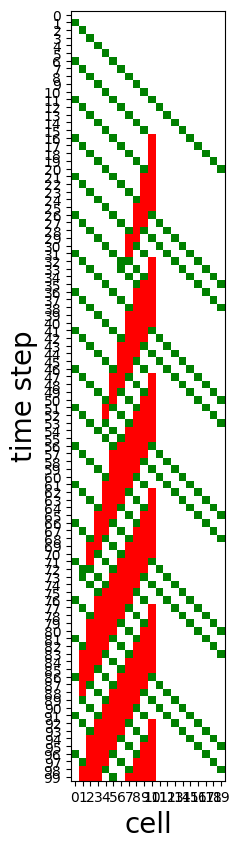

In [5]:
cmap = colors.ListedColormap(['white','red','green'])

fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(s,cmap=cmap)
ax.set_xticks(range(num_cells))
ax.set_yticks(range(num_timesteps))
ax.set_xlabel('cell',fontsize=20)
ax.set_ylabel('time step',fontsize=20)